# Alucar - Analisando as Vendas

In [46]:
import pandas as pd
from pandas.plotting import autocorrelation_plot

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [47]:
pd.read_csv('dados/alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [48]:
alucar = pd.read_csv('dados/alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [49]:
print('Count - Rows and Columns:', alucar.shape)

Count - Rows and Columns: (24, 2)


In [50]:
print('Count - Nulls:', alucar.isna().sum().sum())

Count - Nulls: 0


In [51]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [52]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [53]:
print(sns.__version__)

0.11.2


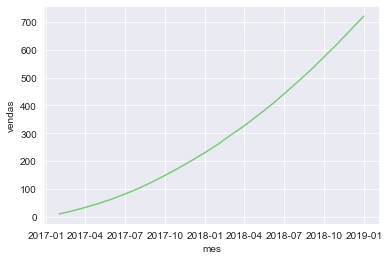

In [54]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

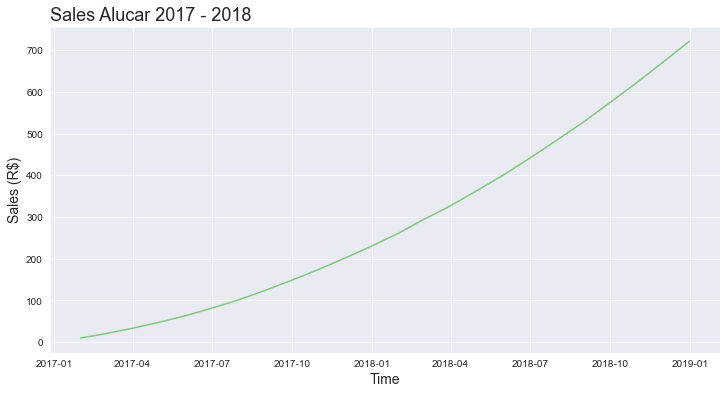

In [55]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Sales Alucar 2017 - 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Time', fontsize = 14)
ax.set_ylabel('Sales (R$)', fontsize = 14)
ax = ax

In [56]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.fillna(0)
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


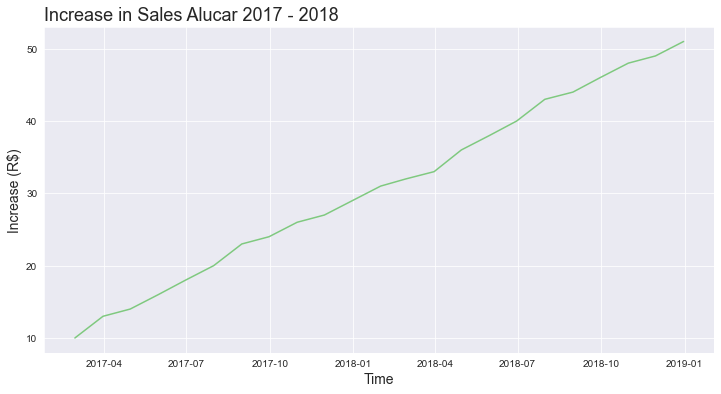

In [57]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Increase in Sales Alucar 2017 - 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Time', fontsize = 14)
ax.set_ylabel('Increase (R$)', fontsize = 14)
ax = ax

In [58]:
def plot(title, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x = x, y = y, data = dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(title, loc = 'left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)
    ax = ax

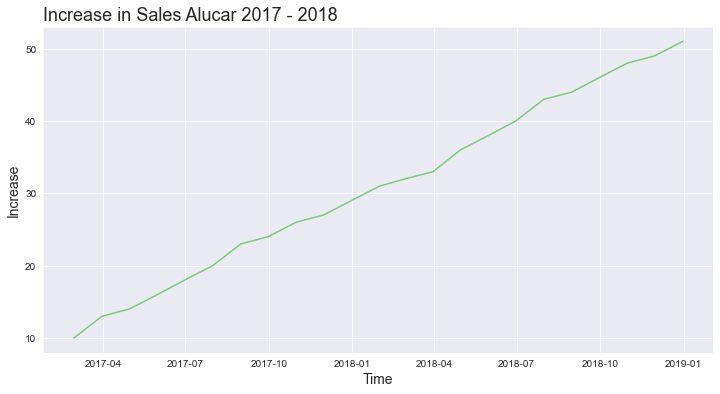

In [59]:
plot('Increase in Sales Alucar 2017 - 2018', 'Time', 'Increase','mes', 'aumento', alucar)

In [60]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


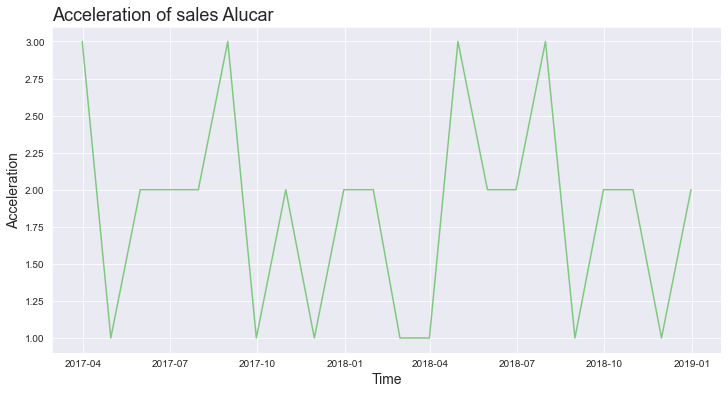

In [61]:
plot('Acceleration of sales Alucar', 'Time', 'Acceleration','mes', 'aceleracao', alucar)

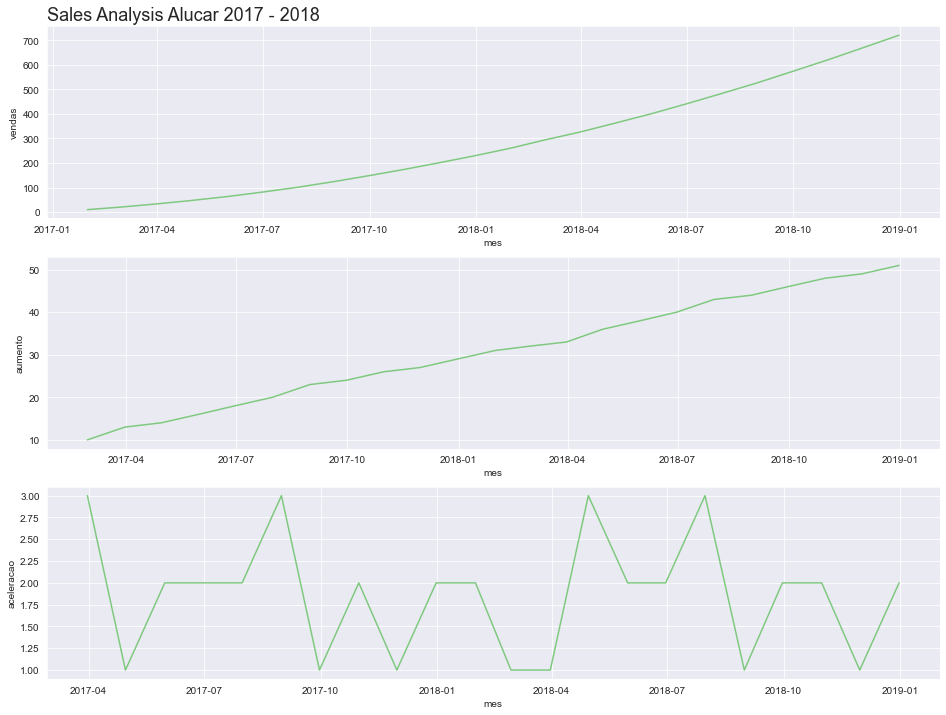

In [62]:
plt.figure(figsize = (16, 12))
ax = plt.subplot(3,1,1)
ax.set_title('Sales Analysis Alucar 2017 - 2018', fontsize = 18, loc = 'left')
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
plt.subplot(3,1,2)
sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
plt.subplot(3,1,3)
sns.lineplot(x = 'mes', y = 'aceleracao', data = alucar)
ax = ax

In [63]:
def plot_comp(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize = (16, 12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y1, data = dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x = x, y = y2, data = dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x = x, y = y3, data = dataset)
    ax = ax

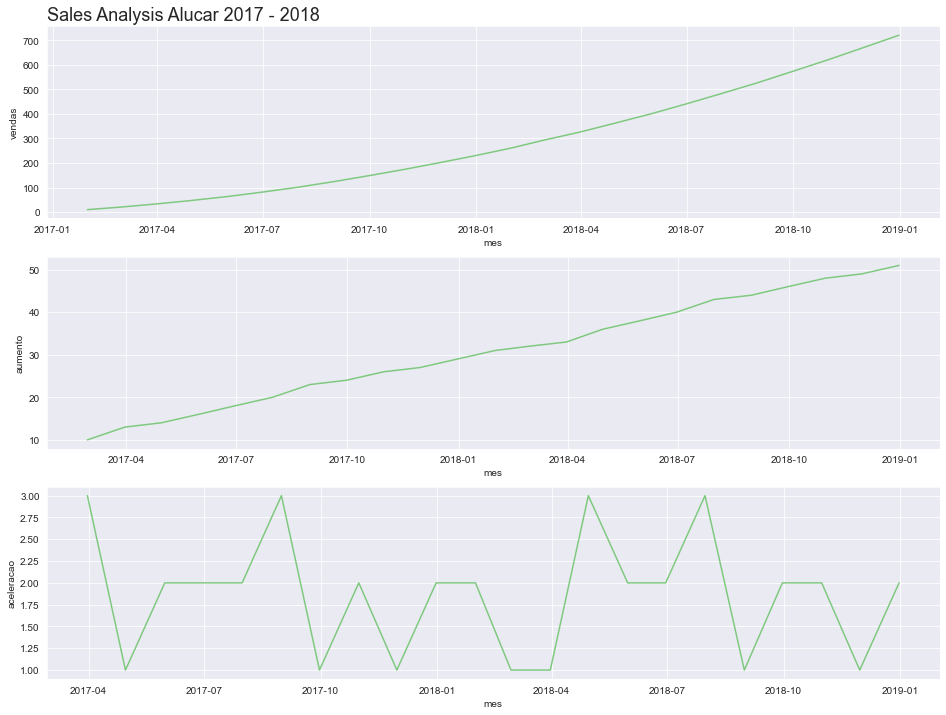

In [64]:
plot_comp('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Sales Analysis Alucar 2017 - 2018')

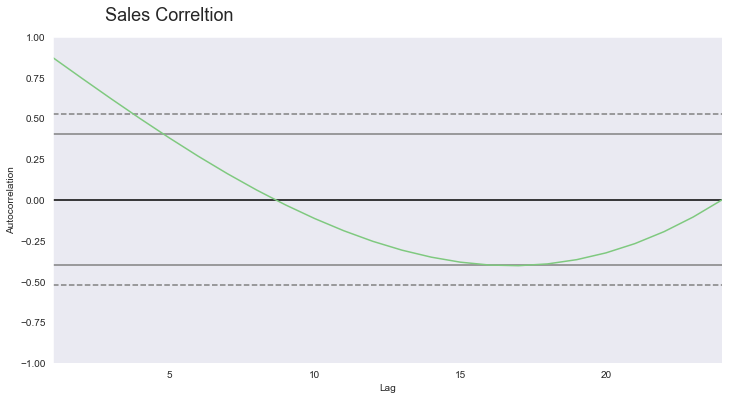

In [65]:
# As vendas de até 7 dias depois possuem correlação com as vendas de 'hoje'
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Sales Correltion', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

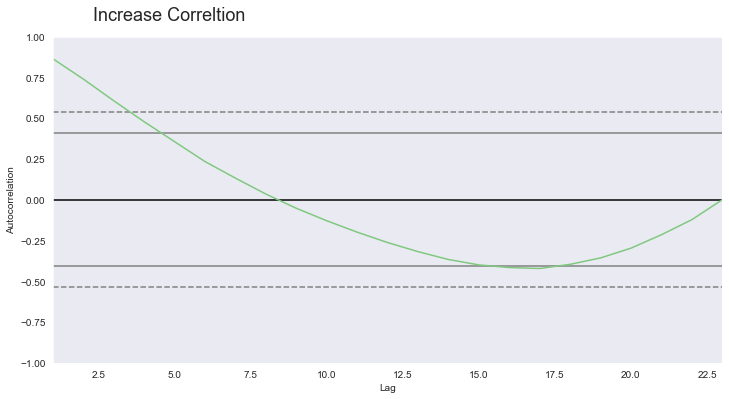

In [66]:
# As vendas de até 7 dias depois possuem correlação com as vendas de 'hoje'
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Increase Correltion', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

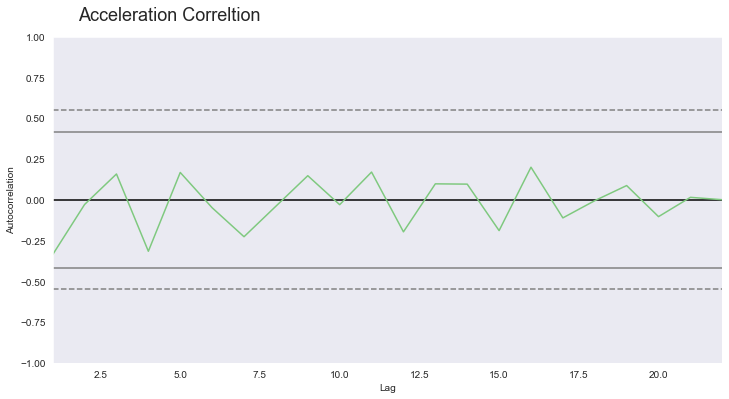

In [67]:
# As vendas de até 7 dias depois possuem correlação com as vendas de 'hoje'
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Acceleration Correltion', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando assinantes da Newsletter

In [68]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [69]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [70]:
print('Count Rows and Columns: ', assinantes.shape)
print('Count nulls:', assinantes.isna().sum().sum())

Count Rows and Columns:  (24, 2)
Count nulls: 0


In [71]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [72]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


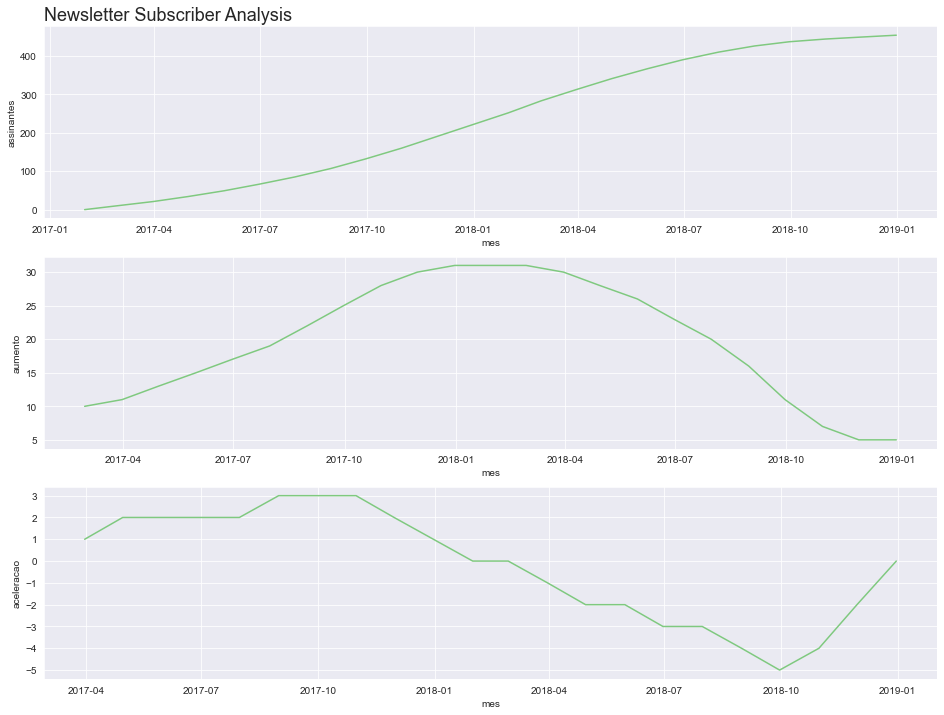

In [73]:
plot_comp('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Newsletter Subscriber Analysis')

# Chocolura - Analisando as Vendas

In [74]:
chocolura = pd.read_csv('dados/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [75]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [76]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [77]:
chocolura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


In [78]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


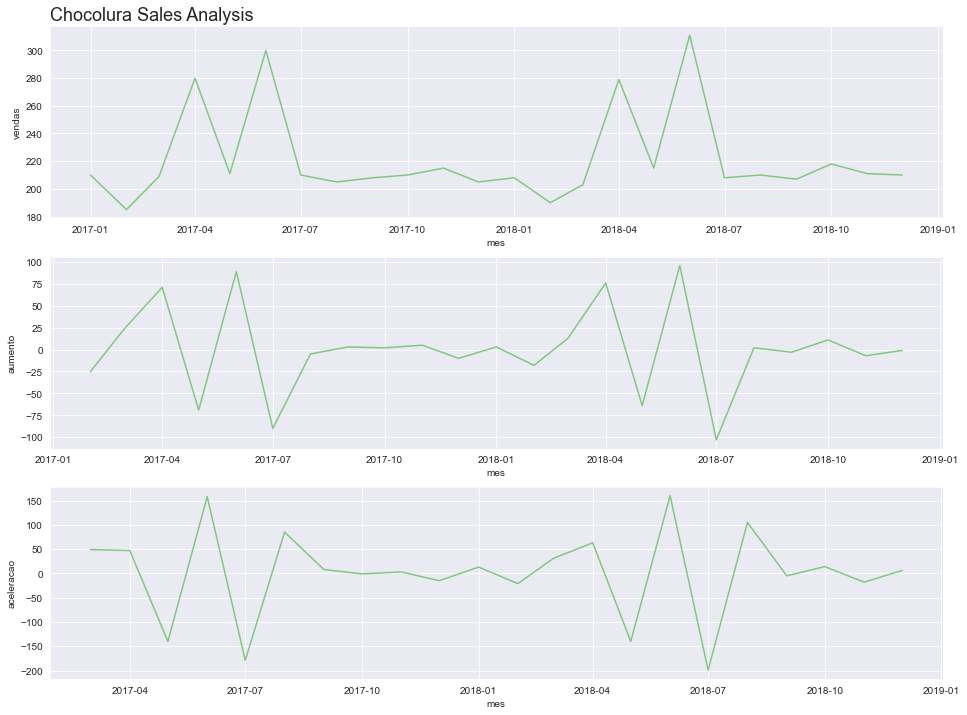

In [79]:
plot_comp('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Chocolura Sales Analysis')

# Chocolura - Vendas diárias (Outubro e Novembro)

In [80]:
vendas_por_dia = pd.read_csv('dados/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [81]:
vendas_por_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dia     61 non-null     object
 1   vendas  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [82]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [83]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [84]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


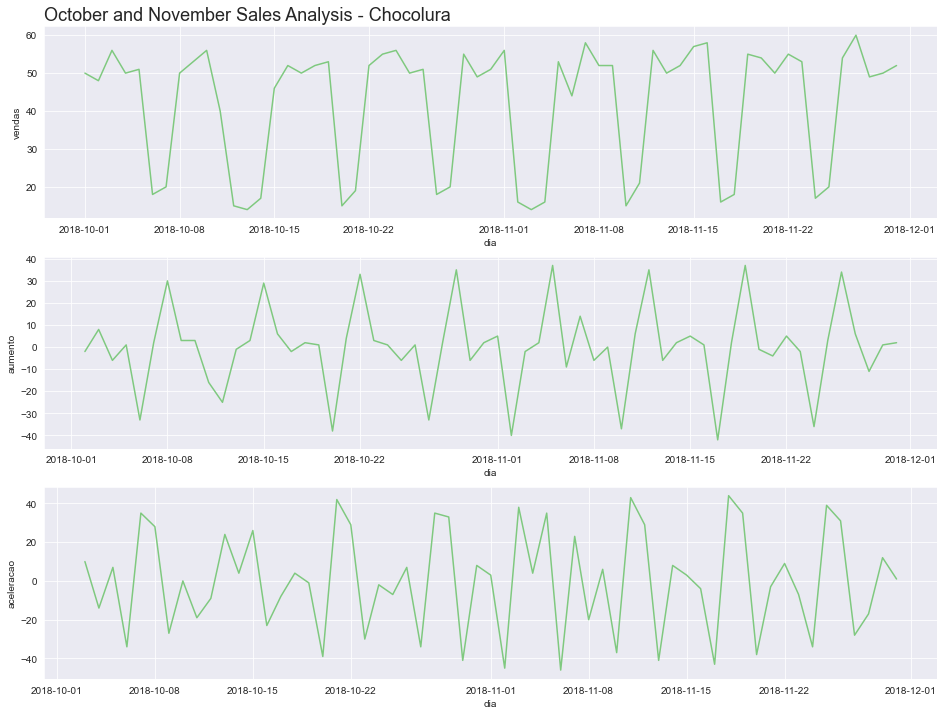

In [85]:
plot_comp('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'October and November Sales Analysis - Chocolura')

**Analisando da Sazonalidade**

In [86]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [87]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [88]:
dias_traduzidos = {'Monday' : 'Segunda', 'Tuesday' : 'Terça', 'Wednesday' : 'Quarta', 'Thursday' : 'Quinta', 'Friday' : 'Sexta', 'Saturday' : 'Sábado',
       'Sunday' : 'Domingo'}

In [89]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head(15)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


**Agrupando os Dias**

In [90]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()
vendas_agrupadas

/var/folders/k7/lw8jsp3s59dc3j9lw94tjndw0000gp/T/ipykernel_13290/759150623.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()


,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


**Correlação das vendas diárias**

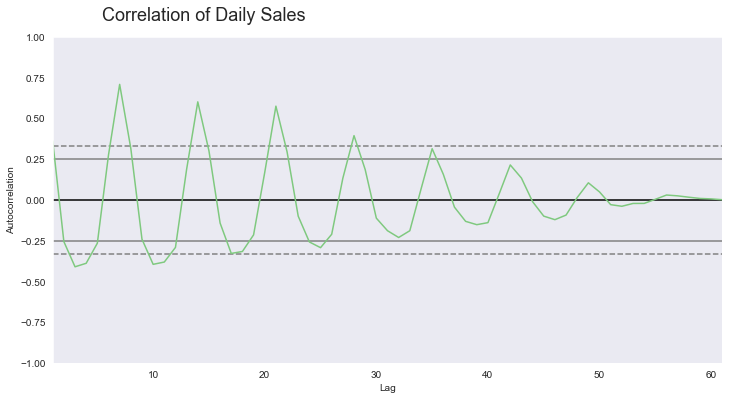

In [91]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlation of Daily Sales', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

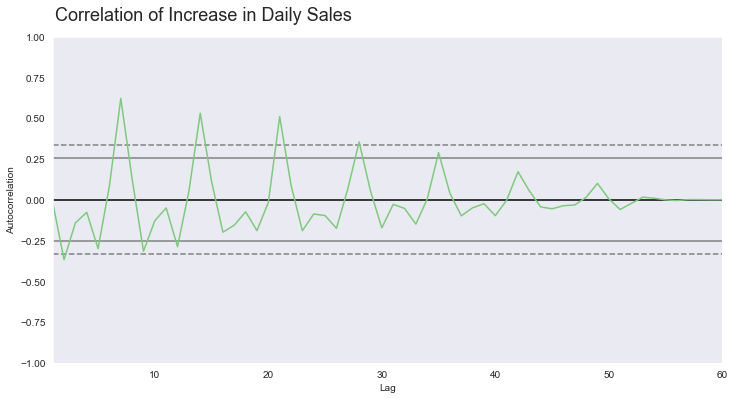

In [93]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlation of Increase in Daily Sales', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

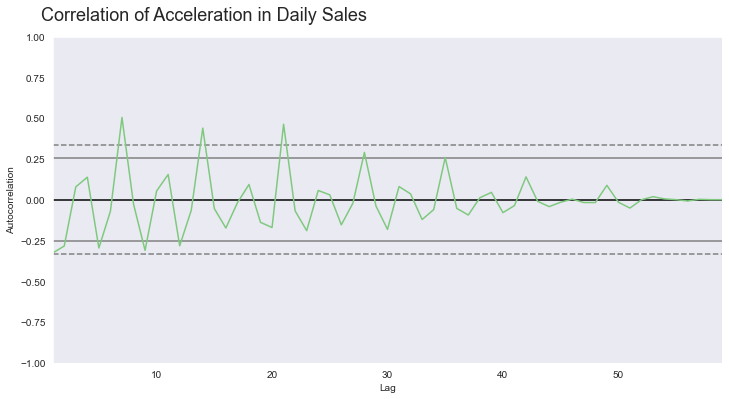

In [96]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlation of Acceleration in Daily Sales', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Cafelura - Análise de Vendas

In [99]:
cafelura = pd.read_csv('dados/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [100]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [101]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [102]:
cafelura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


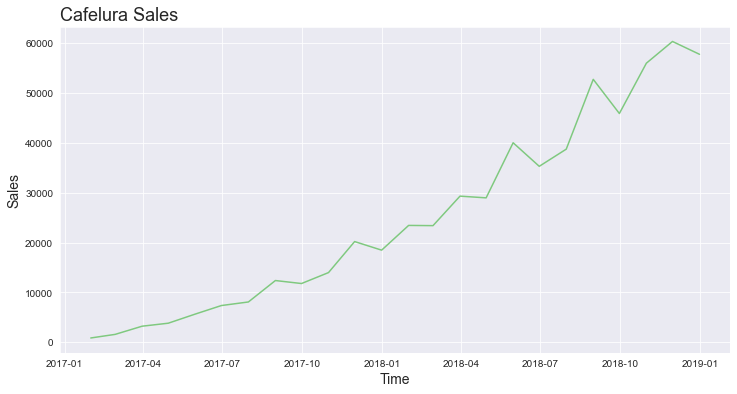

In [105]:
plot('Cafelura Sales', 'Time', 'Sales','mes', 'vendas', cafelura)

In [107]:
quantidade_de_dias_de_fds = pd.read_csv('dados/dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [109]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [110]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


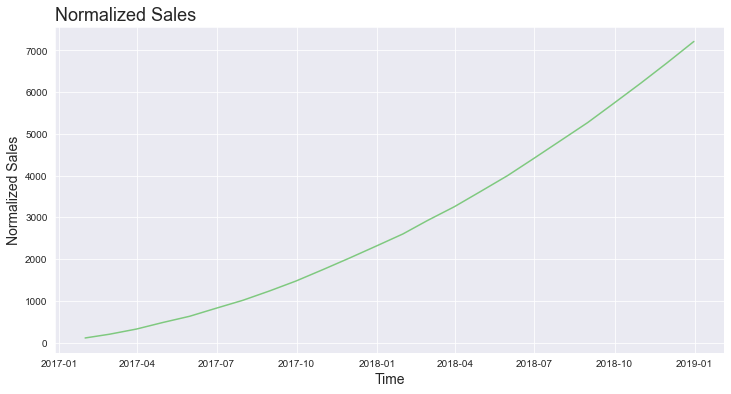

In [111]:
plot('Normalized Sales', 'Time', 'Normalized Sales', 'mes', 'vendas_normalizadas', cafelura)

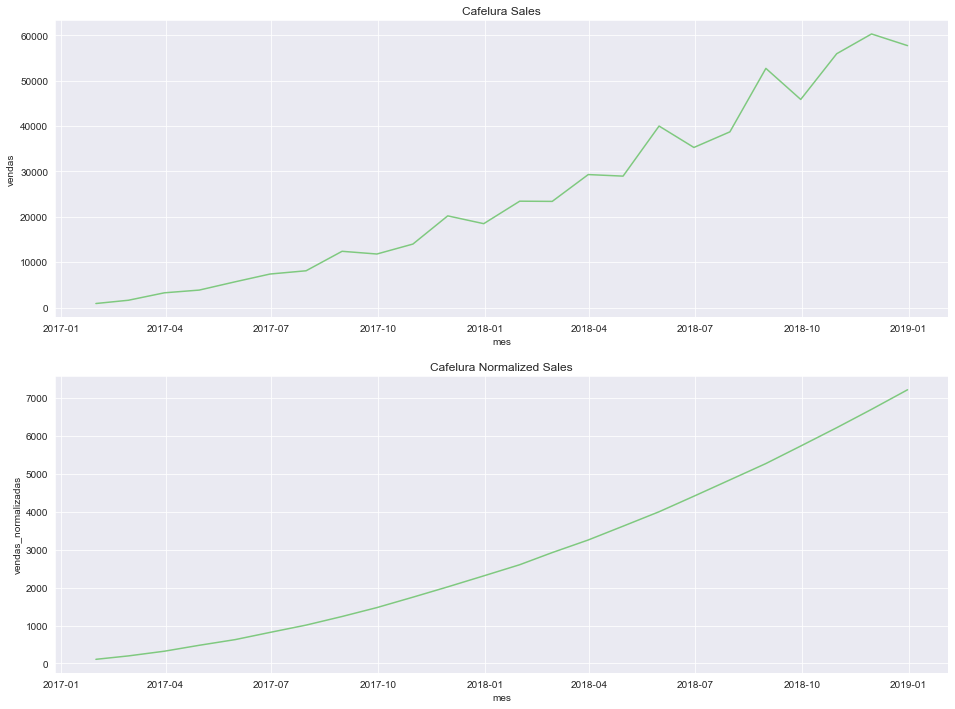

In [113]:
plt.figure(figsize = (16, 12))
ax = plt.subplot(2,1,1)
ax.set_title('Cafelura Sales')
sns.lineplot(x = 'mes', y = 'vendas', data = cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Cafelura Normalized Sales')
sns.lineplot(x = 'mes', y = 'vendas_normalizadas', data = cafelura)
ax = ax

# Statsmodels

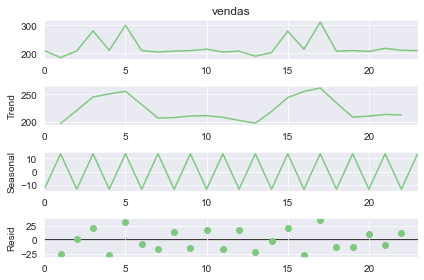

In [120]:
resultado = seasonal_decompose(chocolura['vendas'], period = 2)
ax = resultado.plot()

In [121]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [122]:
data = ({'observacao': observacao, 'tendencia': tendencia, 'sazonalidade': sazonalidade, 'ruido': ruido})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,-13.386364,NaN
1,185.0,197.25,13.386364,-25.636364
2,209.0,220.75,-13.386364,1.636364
3,280.0,245.00,13.386364,21.613636
4,211.0,250.50,-13.386364,-26.113636


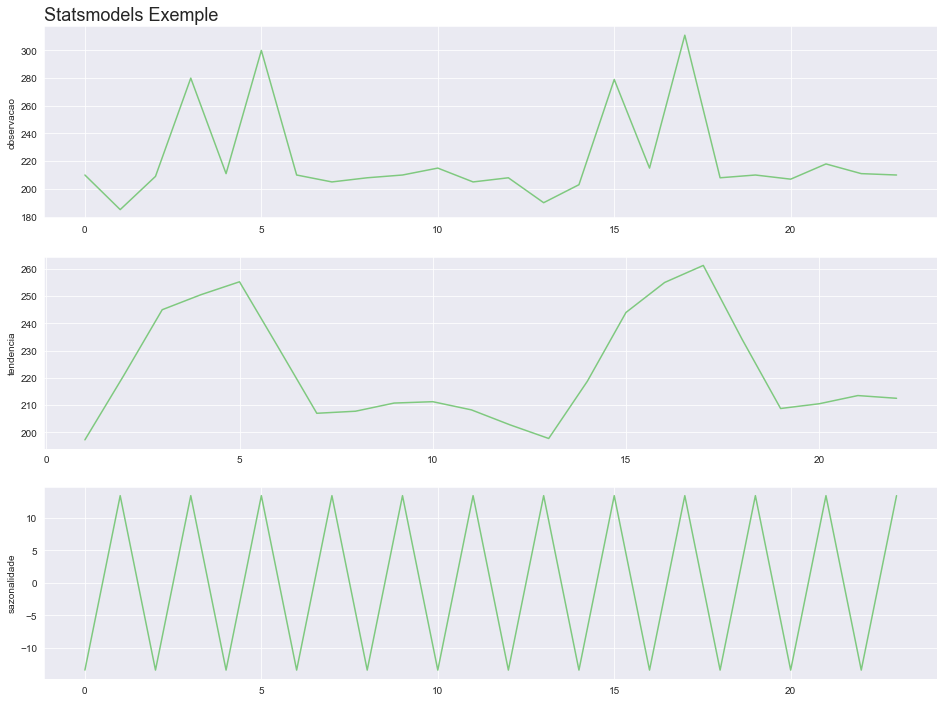

In [124]:
plot_comp(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Statsmodels Exemple')

# Alucel - Análise de Vendas

In [125]:
alucel = pd.read_csv('dados/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [126]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [127]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [128]:
alucel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dia     61 non-null     datetime64[ns]
 1   vendas  61 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


In [129]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


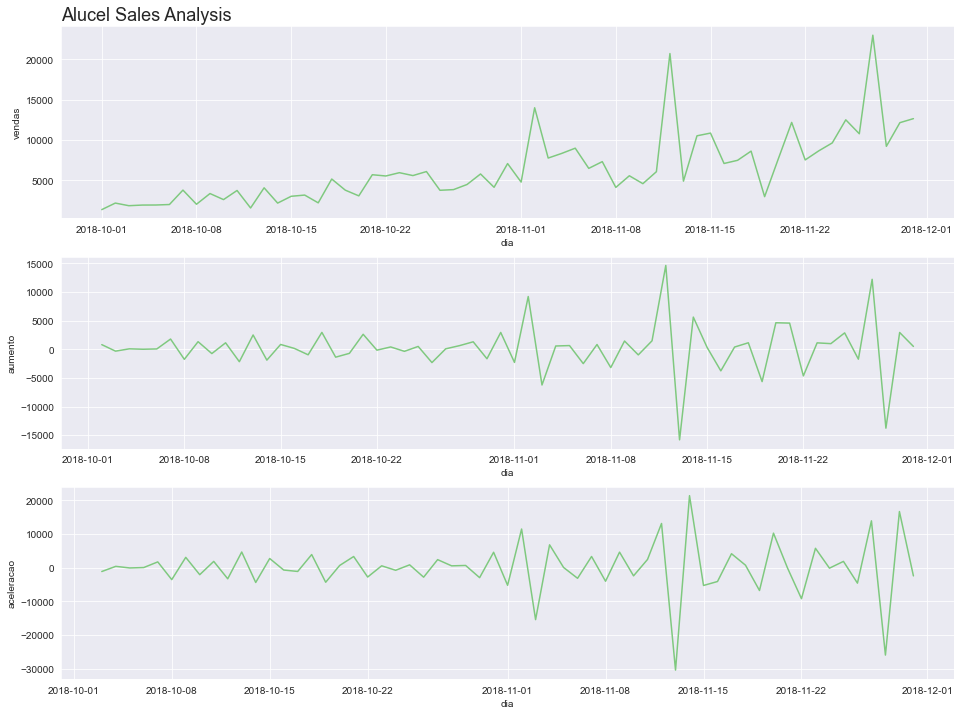

In [130]:
plot_comp('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Alucel Sales Analysis')

**Media Móvel**

In [133]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


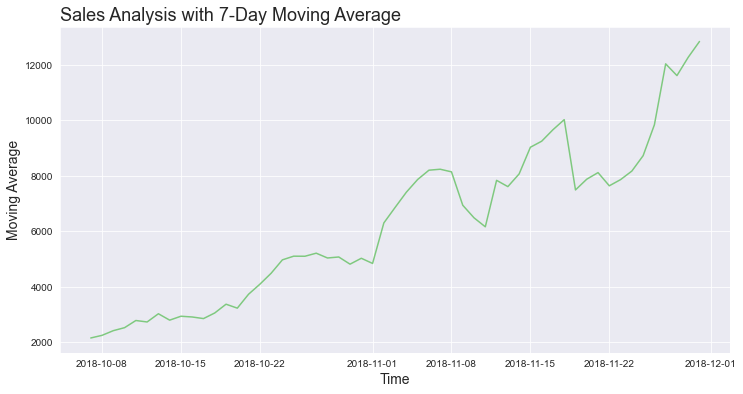

In [134]:
plot('Sales Analysis with 7-Day Moving Average', 'Time', 'Moving Average', 'dia', 'media_movel', alucel)

In [136]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()
alucel.head(21)

,dia,vendas,aumento,aceleracao,media_movel,media_movel_21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429,NaN
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143,NaN
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857,NaN
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571,NaN


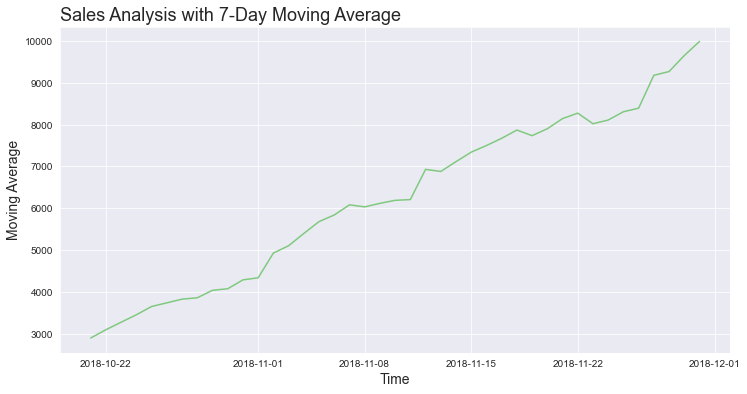

In [137]:
plot('Sales Analysis with 7-Day Moving Average', 'Time', 'Moving Average', 'dia', 'media_movel_21', alucel)

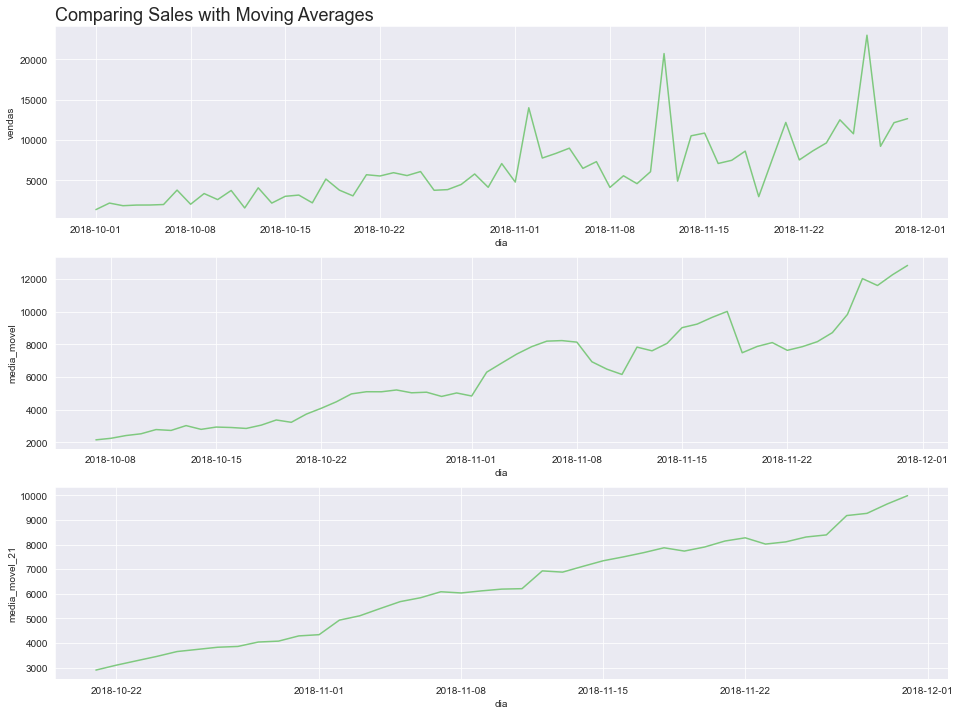

In [138]:
plot_comp('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparing Sales with Moving Averages')